##  EDA and Dimensionality Reduction of Microarray Dataset

### Two-group Comparison of Gene Expression Data

http://dept.stat.lsa.umich.edu/~kshedden/Python-Workshop/gene_expression_comparison.html

"We will conduct a statistical comparison of gene expression values between two groups of biological samples. Gene expression is a measure of the activity of a gene, as reflected in the number of RNA copies of the gene that are present in cells. A microarray assay can be used to measure gene expression for thousands of genes simultaneously. Genes that have different expression patterns in two conditions are said to be 'differentially expressed'.


"The data set we analyze here contains measurements of the expression levels of 22,283 genes in peripheral blood mononuclear cells (PBMCs). Data for 127 subjects are included, 26 of whom have ulcerative colitis, and 59 of whom have Crohn's disease (the remaining subjects are healthy and will not be considered here). The goal is to identify genes that have different mean expression levels in the two disease groups."

https://pubmed.ncbi.nlm.nih.gov/16436634/

Oligonucleotide Array Hybridization and Data Reduction
Total RNA (2 μg) was converted to biotinylated cRNA according to the Affymetrix protocol (Affymetrix, Santa Clara, CA). Labeled cRNA (10 μg) was fragmented and prepared for hybridization as previously described.7 Biotinylated cRNA was hybridized to the Affymetrix HG-U133A human GeneChip array as described in the Affymetrix technical manual. Eleven biotinylated control transcripts ranging in abundance from 1:300,000 (3 ppm) to 1:100 (100 ppm) were spiked into each sample before hybridization to function as a standard curve.9 GeneChip MAS 5.0 software was used to evaluate the specific hybridization intensity, compute signal value for each probe set, and make an absent/present call. The signal value for each probe set was then converted to a frequency value representative of the number of transcripts present in 106 transcripts by reference to the standard curve.9 Each transcript was evaluated and included in the study following nonstringent criteria: called present and at or above a frequency value of 10 (10 ppm) in at least one of the samples (healthy, UC, or CD). Sequences (n = 7908) meeting these filtering criteria were used in the analysis.

https://www.ncbi.nlm.nih.gov/geo/info/soft.html

Description from the web site:

"Simple Omnibus Format in Text (SOFT) is designed for rapid batch submission (and download) of data. SOFT is a simple line-based, plain text format, meaning that SOFT files may be readily generated from common spreadsheet and database applications. A single SOFT file can hold both data tables and accompanying descriptive information for multiple, concatenated Platforms, Samples, and/or Series records.

Affymetrix CHP files and supplementary data files like Affymetrix CEL or GenePix GPR scan files can also be provided - just bundle them together with the SOFT file into a.zip, .rar, or .tar archive using a program like WinZip at the time of submission.

SOFT format supports MIAME-compliant data submissions."

After the SOFT file was downloaded, I separated the metadata from the dataset into two text documents.  I then imported and saved each document as a '.csv' file in Excel.

In [283]:
import pandas as pd
pd.options.display.max_columns = 100
df = pd.read_csv('GSE3365_series_matrix.csv', index_col='ID_REF')

In [284]:
df.head(10)

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,...,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,83.439667,96.306190,97.590530,84.290657,75.129074,60.957428,67.398430,92.212601,106.118111,66.046982,80.529228,77.406029,90.268700,82.054291,71.413727,90.299400,72.794907,71.969261,96.929031,76.718727,82.102768,80.524231,77.979897,90.627449,53.279366,79.884865,67.357033,89.229126,73.211365,92.024094,67.244049,60.275257,109.458366,79.378006,65.843391,64.831474,67.564301,69.343498,51.885433,82.021812,69.092613,86.648949,85.164772,66.932907,88.698059,115.924538,54.548176,85.172340,76.094841,105.453300,...,116.060593,62.348885,76.293533,75.501823,92.877518,78.030060,65.232300,78.701591,80.728653,62.984619,61.671085,78.632156,108.098862,101.264885,92.053673,91.941429,69.540253,105.848045,59.907005,78.973366,99.359177,106.152100,61.220230,79.369629,70.009750,83.154297,61.471455,70.969025,68.403061,72.811928,69.699219,57.945412,64.712952,85.293556,57.370701,62.293842,49.641037,84.936287,72.163025,81.506584,73.627052,85.967392,80.112968,78.884277,84.596169,94.434578,53.559868,87.992722,83.591515,70.783173
1053_at,58.538975,29.406460,43.694721,29.837172,23.998404,36.991768,25.868092,15.754217,23.696472,34.363583,31.123693,33.818295,24.106266,30.126642,21.065430,22.281919,23.054424,37.111023,37.166035,27.578232,38.758053,37.528740,29.412029,24.955235,34.996342,26.930981,28.275997,29.747852,39.730824,28.472483,20.553602,19.083574,44.791676,24.381178,31.387852,32.144615,29.343536,39.208202,41.909023,39.684868,14.712600,32.043266,31.797440,25.805056,33.513592,30.976332,34.622002,43.270184,36.090359,27.638502,...,22.568789,27.913708,25.270542,35.172592,26.766731,28.777603,36.107086,37.902054,25.992645,22.672220,24.485113,21.269075,28.533316,29.067553,22.507162,23.610199,35.794231,21.221462,45.021980,24.709929,38.603519,19.027531,28.588364,32.472713,30.241638,22.248482,14.020452,21.344370,36.728756,26.827475,33.543213,23.574957,29.623316,56.683628,24.928961,20.089695,25.146595,23.030054,26.769665,23.304987,16.210644,29.239016,24.164711,25.854359,32.964684,27.523001,26.973007,35.219315,24.562153,20.446552
117_at,57.109684,60.610279,106.599632,65.975945,62.175732,57.769592,95.766830,51.262897,67.366501,58.003979,59.019379,63.712986,72.808006,63.824825,57.757103,87.840637,85.930443,58.484039,98.968117,61.108086,42.795876,71.524269,49.153461,54.904804,80.450256,47.647572,24.766672,48.697895,38.264908,21.855385,32.766270,42.242554,43.458466,50.851601,37.254311,48.496643,93.033081,129.669540,85.111931,55.822292,34.775608,38.494999,31.438536,28.887539,42.730309,288.143311,127.041969,49.300583,53.878220,25.647038,...,76.027481,41.380928,75.112038,58.521576,50.951267,83.142365,46.662537,68.696716,49.537102,70.321098,64.503807,41.111675,80.120842,87.034660,69.441841,43.052380,47.376255,125.994408,57.032269,92.089417,112.583939,98.315964,39.321968,75.718224,61.480816,63.029938,36.812744,63.996601,45.082336,54.614681,51.386467,55.384586,40.153278,53.697884,47.128002,82.171799,58.479755,51.167358,48.839836,69.793610,42.985600,36.323952,46.344276,50.36

In [285]:
df_crohns_meta = pd.read_csv('meta.csv')

In [286]:
df_crohns_meta.head()

,!Sample_title,"Ulcerative Colitis (55 year old black female, SAK_1285134540)","Ulcerative Colitis (47 year old caucasian male, SAK_1286408661)","Ulcerative Colitis (55 year old caucasian female, SAK_1319013894)","Ulcerative Colitis (60 year old caucasian male, SAK_1305668541)","Ulcerative Colitis (49 year old caucasian female, SAK_1286431014)","Ulcerative Colitis (37 year old caucasian female, SAK_1286609838)","Ulcerative Colitis (41 year old black female, SAK_1304707354)","Ulcerative Colitis (25 year old caucasian female, SAK_1286453367)","Ulcerative Colitis (45 year old caucasian male, SAK_1286475720)","Ulcerative Colitis (30 year old black female, SAK_1286498073)","Ulcerative Colitis (65 year old caucasian male, SAK_1291908052)","Ulcerative Colitis (40 year old caucasian female, SAK_1285156893)","Ulcerative Colitis (27 year old caucasian female, SAK_1286520426)","Ulcerative Colitis (57 year old caucasian female, SAK_1286542779)","Ulcerative Colitis (59 year old caucasian female, SAK_1286565132)","Ulcerative Colitis (27 year old caucasian female, SAK_1286587485)","Ulcerative Colitis (33 year old hispanic female, SAK_1285179246)","Ulcerative Colitis (62 year old caucasian female, SAK_1305735600)","Ulcerative Colitis (41 year old caucasian female, SAK_1318969188)","Ulcerative Colitis (41 year old caucasian female, SAK_1285223952)","Ulcerative Colitis (53 year old caucasian male, SAK_1285246305)","Ulcerative Colitis (42 year old caucasian male, SAK_1285268658)","Ulcerative Colitis (57 year old caucasian male, SAK_1285291011)","Ulcerative Colitis (29 year old caucasian female, SAK_1305780306)","Ulcerative Colitis (73 year old caucasian male, SAK_1285313364)","Ulcerative Colitis (63 year old caucasian female, SAK_1318991541)","Crohn's Disease subject (22 year old black female, SAK_1259740044)","Crohn's Disease subject (46 year old black female, SAK_1259829456)","Crohn's Disease subject (39 year old caucasian male, SAK_1275567445)","Crohn's Disease subject (20 year old black male, SAK_1259851809)","Crohn's Disease subject (47 year old caucasian male, SAK_1263137700)","Crohn's Disease subject (56 year old caucasian male, SAK_1260008280)","Crohn's Disease subject (41 year old caucasian female, SAK_1277825109)","Crohn's Disease subject (21 year old caucasian male, SAK_1260634232)","Crohn's Disease subject (33 year old caucasian male, SAK_1288174788)","Crohn's Disease subject (64 year old caucasian female, SAK_1260745997)","Crohn's Disease subject (29 year old caucasian female, SAK_1280865117)","Crohn's Disease subject (42 year old black female, SAK_1287526311)","Crohn's Disease subject (43 year old black male, SAK_1287548671)","Crohn's Disease subject (47 year old caucasian female, SAK_1280820411)","Crohn's Disease subject (39 year old caucasian female, SAK_1261237763)","Crohn's Disease subject (33 year old caucasian male, SAK_1280753352)","Crohn's Disease subject (52 year old caucasian male, SAK_1280775705)","Crohn's Disease subject (32 year old caucasian male, SAK_1287459252)","Crohn's Disease subject (20 year old caucasian female, SAK_1287906498)","Crohn's Disease subject (27 year old caucasian female, SAK_1275500386)","Crohn's Disease subject (47 year old caucasian female, SAK_1263249533)","Crohn's Disease subject (58 year old caucasian female, SAK_1275433327)","Crohn's Disease subject (33 year old caucasian male, SAK_1260857762)",...,"Crohn's Disease subject (28 year old black male, SAK_1313738586)","Crohn's Disease subject (28 year old caucasian female, SAK_1316711535)","Crohn's Disease subject (22 year old caucasian female, SAK_1316756241)","Crohn's Disease subject (49 year old caucasian female, SAK_1313179761)","Crohn's Disease subject (31 year old caucasian female, SAK_1313134987)","Crohn's Disease subject (38 year old caucasian male, SAK_1316800947)","Crohn's Disease subject (46 year old caucasian female, SAK_1316845653)","Crohn's Disease subject (23 year old caucasian male, SAK_1316577485)","Normal subject (60 year old ca

In [414]:
#construct three lists of disease types
UC = ['GSM76030', 'GSM76031', 'GSM76032', 'GSM76033', 'GSM76034', 'GSM76035', 'GSM76036', 'GSM76037', 'GSM76038', 'GSM76039',
     'GSM76040', 'GSM76041', 'GSM76042', 'GSM76043', 'GSM76044', 'GSM76045', 'GSM76046', 'GSM76047', 'GSM76048', 'GSM76049', 
     'GSM76050', 'GSM76051', 'GSM76052', 'GSM76053', 'GSM76054', 'GSM76055']

CD = ['GSM76056', 'GSM76057', 'GSM76058', 'GSM76059', 'GSM76060', 'GSM76061', 'GSM76062', 'GSM76063', 'GSM76064', 'GSM76065',
     'GSM76066', 'GSM76067', 'GSM76068', 'GSM76069', 'GSM76070', 'GSM76071', 'GSM76072', 'GSM76073', 'GSM76074', 'GSM76075',
     'GSM76076', 'GSM76077', 'GSM76078', 'GSM76079', 'GSM76080', 'GSM76081', 'GSM76082', 'GSM76083', 'GSM76084', 'GSM76085',
     'GSM76086', 'GSM76087', 'GSM76088', 'GSM76089', 'GSM76090', 'GSM76091', 'GSM76092', 'GSM76093', 'GSM76094', 'GSM76095',
     'GSM76096', 'GSM76097', 'GSM76098', 'GSM76099', 'GSM76100', 'GSM76101', 'GSM76102', 'GSM76103', 'GSM76104', 'GSM76105',
     'GSM76106', 'GSM76107', 'GSM76108', 'GSM76109', 'GSM76110', 'GSM76111', 'GSM76112', 'GSM76113', 'GSM76114']

NM = ['GSM76115', 'GSM76116', 'GSM76117', 'GSM76118', 'GSM76119', 'GSM76120', 'GSM76121', 'GSM76122', 'GSM76123', 'GSM76124', 
      'GSM76125', 'GSM76126', 'GSM76127', 'GSM76128', 'GSM76129', 'GSM76130', 'GSM76131', 'GSM76132', 'GSM76133', 'GSM76134', 
      'GSM76135', 'GSM76136', 'GSM76137', 'GSM76138', 'GSM76139', 'GSM76140', 'GSM76141', 'GSM76142', 'GSM76143', 'GSM76144', 
      'GSM76145', 'GSM76146', 'GSM76147', 'GSM76148', 'GSM76149', 'GSM76150', 'GSM76151', 'GSM76152', 'GSM76153', 'GSM76154', 
      'GSM76155', 'GSM76156']

In [415]:
df_crohns_meta

,!Sample_title,"Ulcerative Colitis (55 year old black female, SAK_1285134540)","Ulcerative Colitis (47 year old caucasian male, SAK_1286408661)","Ulcerative Colitis (55 year old caucasian female, SAK_1319013894)","Ulcerative Colitis (60 year old caucasian male, SAK_1305668541)","Ulcerative Colitis (49 year old caucasian female, SAK_1286431014)","Ulcerative Colitis (37 year old caucasian female, SAK_1286609838)","Ulcerative Colitis (41 year old black female, SAK_1304707354)","Ulcerative Colitis (25 year old caucasian female, SAK_1286453367)","Ulcerative Colitis (45 year old caucasian male, SAK_1286475720)","Ulcerative Colitis (30 year old black female, SAK_1286498073)","Ulcerative Colitis (65 year old caucasian male, SAK_1291908052)","Ulcerative Colitis (40 year old caucasian female, SAK_1285156893)","Ulcerative Colitis (27 year old caucasian female, SAK_1286520426)","Ulcerative Colitis (57 year old caucasian female, SAK_1286542779)","Ulcerative Colitis (59 year old caucasian female, SAK_1286565132)","Ulcerative Colitis (27 year old caucasian female, SAK_1286587485)","Ulcerative Colitis (33 year old hispanic female, SAK_1285179246)","Ulcerative Colitis (62 year old caucasian female, SAK_1305735600)","Ulcerative Colitis (41 year old caucasian female, SAK_1318969188)","Ulcerative Colitis (41 year old caucasian female, SAK_1285223952)","Ulcerative Colitis (53 year old caucasian male, SAK_1285246305)","Ulcerative Colitis (42 year old caucasian male, SAK_1285268658)","Ulcerative Colitis (57 year old caucasian male, SAK_1285291011)","Ulcerative Colitis (29 year old caucasian female, SAK_1305780306)","Ulcerative Colitis (73 year old caucasian male, SAK_1285313364)","Ulcerative Colitis (63 year old caucasian female, SAK_1318991541)","Crohn's Disease subject (22 year old black female, SAK_1259740044)","Crohn's Disease subject (46 year old black female, SAK_1259829456)","Crohn's Disease subject (39 year old caucasian male, SAK_1275567445)","Crohn's Disease subject (20 year old black male, SAK_1259851809)","Crohn's Disease subject (47 year old caucasian male, SAK_1263137700)","Crohn's Disease subject (56 year old caucasian male, SAK_1260008280)","Crohn's Disease subject (41 year old caucasian female, SAK_1277825109)","Crohn's Disease subject (21 year old caucasian male, SAK_1260634232)","Crohn's Disease subject (33 year old caucasian male, SAK_1288174788)","Crohn's Disease subject (64 year old caucasian female, SAK_1260745997)","Crohn's Disease subject (29 year old caucasian female, SAK_1280865117)","Crohn's Disease subject (42 year old black female, SAK_1287526311)","Crohn's Disease subject (43 year old black male, SAK_1287548671)","Crohn's Disease subject (47 year old caucasian female, SAK_1280820411)","Crohn's Disease subject (39 year old caucasian female, SAK_1261237763)","Crohn's Disease subject (33 year old caucasian male, SAK_1280753352)","Crohn's Disease subject (52 year old caucasian male, SAK_1280775705)","Crohn's Disease subject (32 year old caucasian male, SAK_1287459252)","Crohn's Disease subject (20 year old caucasian female, SAK_1287906498)","Crohn's Disease subject (27 year old caucasian female, SAK_1275500386)","Crohn's Disease subject (47 year old caucasian female, SAK_1263249533)","Crohn's Disease subject (58 year old caucasian female, SAK_1275433327)","Crohn's Disease subject (33 year old caucasian male, SAK_1260857762)",...,"Crohn's Disease subject (28 year old black male, SAK_1313738586)","Crohn's Disease subject (28 year old caucasian female, SAK_1316711535)","Crohn's Disease subject (22 year old caucasian female, SAK_1316756241)","Crohn's Disease subject (49 year old caucasian female, SAK_1313179761)","Crohn's Disease subject (31 year old caucasian female, SAK_1313134987)","Crohn's Disease subject (38 year old caucasian male, SAK_1316800947)","Crohn's Disease subject (46 year old caucasian female, SAK_1316845653)","Crohn's Disease subject (23 year old caucasian male, SAK_1316577485)","Normal subject (60 year old ca

### Cleaning

Data Cleaning for the SOFT dataset is simple, as the only values are expression values.  Gene expression data is usually analyzed on the log scale

In [416]:
crohns = np.log(df) / np.log(2)
crohns.head()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,...,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.382661,6.589557,6.608669,6.397301,6.231299,5.929730,6.074643,6.526892,6.729527,6.045421,6.331441,6.274374,6.496154,6.358507,6.158130,6.496644,6.185766,6.169309,6.598857,6.261507,6.359359,6.331351,6.285030,6.501876,5.735505,6.319850,6.073757,6.479443,6.193996,6.523940,6.071335,5.913494,6.774238,6.310667,6.040967,6.018622,6.078189,6.115689,5.697258,6.357936,6.110460,6.437110,6.412185,6.064644,6.470831,6.857042,5.769459,6.412313,6.249727,6.720460,...,6.858734,5.962292,6.253489,6.238440,6.537258,6.285958,6.027515,6.298321,6.335009,5.976928,5.946522,6.297048,6.756208,6.661990,6.524403,6.522643,6.119776,6.725851,5.904653,6.303294,6.634581,6.729989,5.935937,6.310515,6.129484,6.377719,5.941845,6.149118,6.095989,6.186103,6.123071,5.856623,6.015983,6.414365,5.842242,5.961018,5.633461,6.408309,6.173188,6.348845,6.202164,6.425718,6.323964,6.301666,6.402520,6.561243,5.743080,6.459312,6.385285,6.145335
1053_at,5.871326,4.878061,5.449387,4.899039,4.584867,5.209132,4.693102,3.977666,4.566600,5.102809,4.959941,5.079732,4.591336,4.912968,4.396805,4.477802,4.526972,5.213776,5.215913,4.785458,5.276424,5.229924,4.878334,4.641271,5.129132,4.751195,4.821506,4.894714,5.312187,4.831496,4.361319,4.254259,5.485159,4.607696,4.972134,5.006505,4.874971,5.293084,5.389189,5.310517,3.878980,5.001949,4.990839,4.689582,5.066674,4.953094,5.113617,5.435301,5.173542,4.788608,...,4.496257,4.802902,4.659385,5.136380,4.742369,4.846875,5.174210,5.244204,4.700032,4.502854,4.613833,4.410685,4.834576,4.861338,4.492312,4.561338,5.161655,4.407452,5.492558,4.627019,5.270660,4.250016,4.837356,5.021156,4.918464,4.475635,3.809461,4.415784,5.198838,4.745639,5.067949,4.559183,4.888661,5.824860,4.639751,4.328384,4.652291,4.525446,4.742527,4.542567,4.018870,4.869823,4.594830,4.692336,5.042849,4.782566,4.753444,5.138295,4.618365,4.353786
117_at,5.835663,5.921491,6.736059,6.043868,5.958280,5.852238,6.581454,5.679843,6.073959,5.858080,5.883117,5.993516,6.186025,5.996046,5.851926,6.456817,6.425097,5.869971,6.628892,5.933291,5.419400,6.160361,5.619221,5.778860,6.330025,5.574331,4.630328,5.605788,5.257950,4.449917,5.034140,5.400625,5.441565,5.668221,5.219335,5.599813,6.539672,7.018696,6.411289,5.802769,5.120004,5.266599,4.974462,4.852375,5.417188,8.170643,6.989161,5.623533,5.751630,4.680720,...,6.248449,5.370894,6.230972,5.870897,5.671046,6.377512,5.544193,6.102169,5.630438,6.135886,6.011312,5.361476,6.324106,6.443518,6.117733,5.428021,5.566092,6.977216,5.833707,6.524963,6.814857,6.619354,5.297264,6.242569,5.942064,5.977965,5.202133,5.999923,5.494490,5.771217,5.683317,5.791413,5.327446,5.746793,5.558513,6.360571,5.869865,5.677152,5.609986,6.125023,5.425782,5.182849,5.534319,5.654300,5.712656,6.079347,5.873668,5.945533,5.981726,5.419848
121_at,8.103100,8.443505,8.494700,7.895723,7.946928,8.134139,8.011350,8.199173,8.511109,8.347532,8.157562,8.136901,8.345359,8.184977,8.033005,8.035576,7.738157,8.068512,8.053709,8.067641,8.114891,8.031708,8.101416,8.153414,7.781820,7.955671,8.326602,

In [417]:
crohns.isnull().sum()

GSM76030    1
GSM76031    1
GSM76032    1
GSM76033    1
GSM76034    1
           ..
GSM76152    1
GSM76153    1
GSM76154    1
GSM76155    1
GSM76156    1
Length: 127, dtype: int64

In [418]:
crohns.fillna(0, inplace=True)

In [419]:
crohns.isnull().sum()

GSM76030    0
GSM76031    0
GSM76032    0
GSM76033    0
GSM76034    0
           ..
GSM76152    0
GSM76153    0
GSM76154    0
GSM76155    0
GSM76156    0
Length: 127, dtype: int64

In [420]:
crohns.to_csv('crohns.csv')

### Covariance

From the original paper:

The analysis of covariance model included terms for disease group, gender, neutrophil percent, monocyte percent, and eosinophil percent. In the analysis of covariance, a slope describing the linear relationship between the percentage of the cell type and the expression level for a particular gene was estimated for each cell type, and a t-test was done to determine whether the slope was significantly different from 0 (where a slope of 0 indicates that there is no linear relationship between cell type percent and expression level).

See Table 2

### PCA

From the original paper:

Gene Selection and Supervised Class Prediction
Gene selection and supervised class prediction were performed using Genecluster version 2.0 (http://www.broad/mit.edu/cancer/software/software.html).10 In these analyses only 4228 transcripts meeting a stringent data reduction filter (at least 50% present calls in Crohn’s or UC samples and at least 50% of the Crohn’s or UC samples with frequencies greater than 10 ppm) were used. Samples within each group were randomly selected for membership in a training set (75%) or a test set (25%) of profiles. Gene selection was performed using the training set of samples, and the classifier with the fewest genes that exhibited the highest overall accuracy of class assignment in the training set was identified by leave-one-out cross validation. The predictive classification model was then evaluated on samples in the test set, and the overall accuracy of class assignment for samples in the test set was reported.

Perform PCA to apply a data reduction and feature selection filter similar to above.

***Workflow is from Statsquest/youtube.com (https://www.youtube.com/watch?v=Lsue2gEM9D0&t=627s)

In [421]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [422]:
# Transpose the dataframe such that the patients are the rows and the genes are the columns (features)
t_crohns = StandardScaler().fit_transform(crohns.T)

In [423]:
pca = PCA()

In [424]:
pca.fit(t_crohns)

PCA()

In [425]:
pca_data = pca.transform(t_crohns)

In [426]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [427]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] #from StatQuest:PCA in Python on youtube.com 

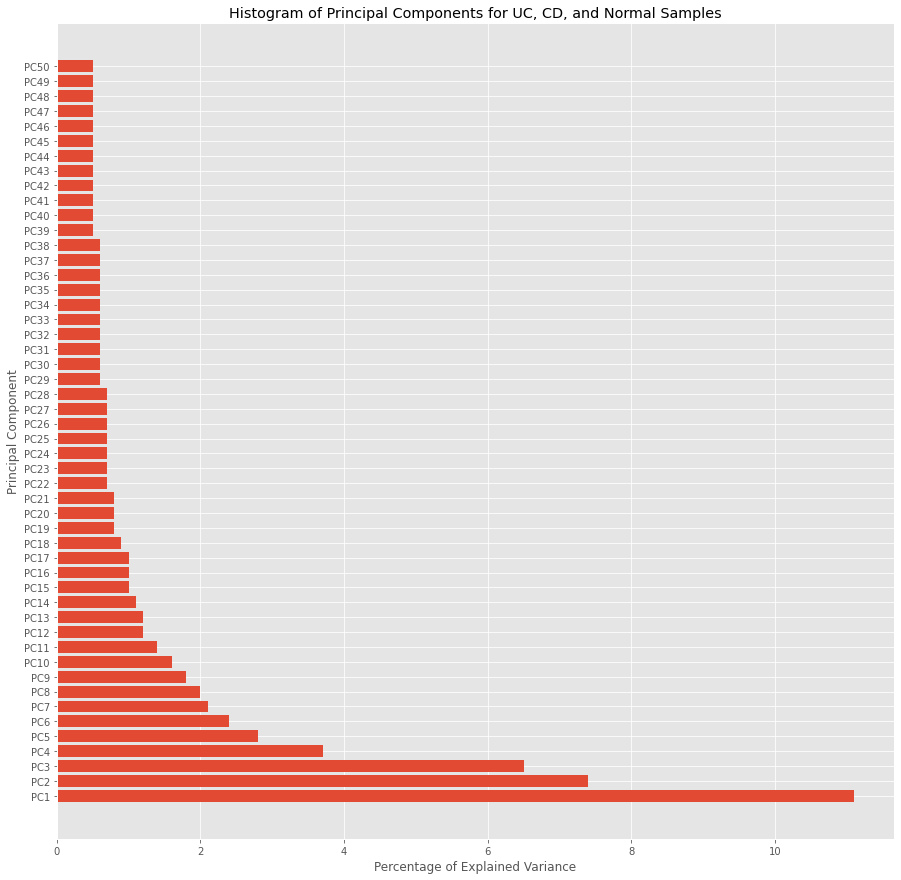

In [459]:
plt.figure(figsize = (15, 15))
plt.barh(y=range(1,len(per_var)+1)[:50], width=per_var[:50], tick_label=labels[:50])
plt.ylabel('Principal Component')
plt.xlabel('Percentage of Explained Variance')
plt.title('Histogram of Principal Components for UC, CD, and Normal Samples')
plt.show()

In [456]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 50 components): {np.round(var_exp[:50],3)}')


# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 50 components): {np.round(cum_var_exp[:50],3)}')

Explained variance (first 50 components): [0.111 0.074 0.065 0.037 0.028 0.024 0.021 0.02  0.018 0.016 0.014 0.012
 0.012 0.011 0.01  0.01  0.01  0.009 0.008 0.008 0.008 0.007 0.007 0.007
 0.007 0.007 0.007 0.007 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006
 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005]
Cumulative explained variance (first 50 components): [0.111 0.185 0.251 0.288 0.315 0.339 0.361 0.381 0.399 0.415 0.43  0.442
 0.454 0.465 0.475 0.485 0.495 0.504 0.512 0.52  0.528 0.536 0.543 0.55
 0.557 0.564 0.57  0.577 0.583 0.59  0.596 0.602 0.608 0.614 0.62  0.625
 0.631 0.637 0.642 0.648 0.653 0.658 0.664 0.669 0.674 0.679 0.684 0.689
 0.694 0.699]


In [479]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 100 components): {np.round(var_exp[:100],3)}')


# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 100 components): {np.round(cum_var_exp[:100],3)}')

#Code adapted from General Assembly PCA Lesson

Explained variance (first 100 components): [0.111 0.074 0.065 0.037 0.028 0.024 0.021 0.02  0.018 0.016 0.014 0.012
 0.012 0.011 0.01  0.01  0.01  0.009 0.008 0.008 0.008 0.007 0.007 0.007
 0.007 0.007 0.007 0.007 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006
 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.004 0.004 0.004 0.004]
Cumulative explained variance (first 100 components): [0.111 0.185 0.251 0.288 0.315 0.339 0.361 0.381 0.399 0.415 0.43  0.442
 0.454 0.465 0.475 0.485 0.495 0.504 0.512 0.52  0.528 0.536 0.543 0.55
 0.557 0.564 0.57  0.577 0.583 0.59  0.596 0.602 0.608 0.614 0.62  0.625
 0.631 0.637 0.642 0.648 0.653 0.658 0.664 0.669 0.674 0.679 0.684 0.689
 0

In [429]:
pca_df = pd.DataFrame(pca_data, index=crohns.columns, columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127
GSM76030,-22.259883,-19.480584,-4.606214,-1.539870,-0.968413,-5.629241,16.371357,-28.410124,-3.899113,-14.365625,-22.780590,-5.597875,10.990023,-17.998021,-9.967589,-10.923623,-20.846284,-1.367078,49.252942,-1.952910,-24.232572,14.659378,28.734162,-0.065149,-7.247975,2.560847,0.638577,-0.709552,11.481361,10.170562,-5.120461,0.331108,-0.992809,7.918089,3.807111,17.589705,11.339951,-6.878499,10.409271,-0.292062,12.822802,-1.006472,-0.224210,0.849008,5.715388,-9.509974,2.185964,13.095664,0.336403,-2.970286,...,13.154098,5.351988,18.350659,1.221264,-7.943834,15.124434,-11.337564,13.283525,0.485081,2.692949,-10.105090,-2.084216,-5.559858,-21.150734,6.642410,6.161565,-8.557471,-21.958844,4.857887,16.696226,6.596172,-1.053468,-7.725841,-4.104484,13.061218,21.598469,4.540221,9.479448,10.293306,9.285092,12.647641,-3.908816,-3.449225,-11.729237,-13.934899,-0.570816,-15.313128,17.666545,7.213731,1.126880,-4.531287,-0.811147,-2.635906,2.058194,-11.481368,2.724205,2.841099,0.487390,-8.410930,1.076916e-14
GSM76031,73.306650,-8.091231,40.208201,-39.141038,-10.922813,16.312498,-1.221632,-6.682472,-43.084475,-34.566891,24.014097,6.379981,-12.635001,-8.221995,12.172980,-2.908591,-8.976621,-11.829459,-5.461230,3.110469,-0.042524,2.142728,-7.368352,1.102051,7.425998,-4.455268,7.775673,1.583978,-9.091746,-2.397211,-2.818264,5.091121,5.333755,10.286069,-0.149691,-2.474060,-4.397404,3.291270,5.240441,-2.193902,3.391862,2.237578,0.121272,-5.680098,-0.141175,-7.944039,7.491828,-2.636779,-12.553289,1.783996,...,15.299801,11.595721,-1.852198,2.654203,-2.495969,4.681222,-0.731982,-0.337162,-2.154664,-12.139425,-3.272037,-0.377166,-0.088655,24.150213,-2.184733,1.316472,15.196782,5.312583,-8.427193,3.622286,-17.035876,-1.623489,13.991376,-15.498505,2.135819,9.999779,-10.421438,-15.488686,29.773571,-8.551706,4.084963,2.865709,-16.454813,12.509128,5.843464,-5.243155,2.041427,18.351215,-15.514214,29.078090,-6.406950,-27.515455,-7.045823,-20.314823,-7.031675,-3.962045,-12.571565,1.808125,-1.949042,5.007106e-14
GSM76032,58.999811,72.331030,25.399796,-27.764069,12.239169,-14.717735,-0.178844,-11.349844,24.689003,-5.169205,2.369273,0.197512,-34.130024,3.588159,24.265558,-13.440340,-10.020336,-15.546759,5.857166,-10.884708,-20.461310,46.799063,-10.681252,-23.555839,42.223577,5.238220,-8.228813,-24.763853,20.804736,-18.011574,-29.053749,12.402373,3.739855,-33.789075,-14.328510,-9.503342,12.582914,3.388110,-3.362016,27.359463,11.090348,-0.459859,8.366212,19.036236,13.355355,-7.317841,-5.458397,3.672536,19.880665,4.291249,...,-7.869987,-2.890900,-3.172708,-4.733863,-0.041844,3.291758,6.448472,-5.892937,1.367147,-2.226624,2.830077,-2.014101,2.662542,-4.429217,-2.192924,-1.096971,-0.271472,3.339203,1.610944,0.574354,-0.134860,-6.526559,1.975365,1.112063,2.075385,-2.039481,2.122753,-2.339922,0.057438,-2.855092,-1.624544,-5.096221,-0.410221,-0.398947,-0.421943,-5.451694,2.121405,-3.154096,-1.510487,-1.471130,1.189751,-2.794192,-1.334930,2.395866,-2.208823,1.985952,-5.739958,2.431467,3.139608,-7.449596e-14
GSM76033,13.465870,69.302729,4.411623,-14.952029,16.688893,24.080936,-36.134118,-6.158081,-27.026623,-3.568637,22.355871,-3.322170,-6.759172,-10.055839,-0.086747,-14.906797,4.108760,2.847647,-0.966165,-2.466725,-1.788420,10.875663,2.018887,10.934612,12.354274,-0.305674,-2.333826,8.087319,-1.830373,-0.198142,-9.575179,3.184261,-1.804100,1.610722,4.847258,-3.605851,7.355524,4.978447,3.340074,-3.760047,-11.943850,7.058306,1.375351,-7.858164,-7.476276,-6.72558

In [430]:
pca_df.to_csv('pca_total.csv', index=False)

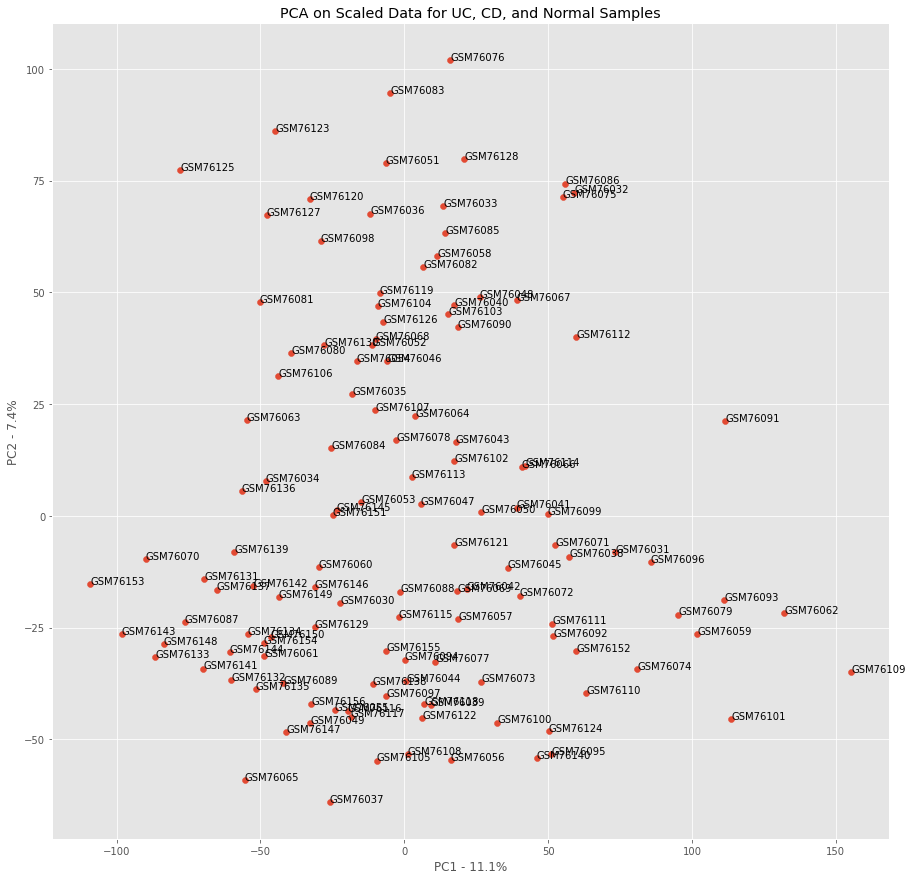

In [431]:
#Scatterplot of data with first and second principal components
plt.figure(figsize = (15, 15))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA on Scaled Data for UC, CD, and Normal Samples')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

### Determine which genes were involved in separating the cells from each other

In [432]:
loading_scores = pd.Series(pca.components_[0], index=crohns.index)

In [433]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False) #Sort based on magnitude (absolute value)

In [434]:
top_genes = sorted_loading_scores[0:50].index.values
top_genes

array(['205918_at', '211162_x_at', '207140_at', '211788_s_at',
       '212383_at', '206725_x_at', '210504_at', '220947_s_at',
       '205600_x_at', '207685_at', '200750_s_at', '55705_at',
       '217117_x_at', '48612_at', '205902_at', '217377_x_at', '221870_at',
       '78047_s_at', '214093_s_at', '216671_x_at', '217040_x_at',
       '209018_s_at', '216993_s_at', '221966_at', '202426_s_at',
       '205575_at', '219107_at', '210051_at', '203721_s_at',
       '206196_s_at', '213025_at', '336_at', '216854_at', '204682_at',
       '207035_at', '209067_s_at', '222083_at', '208494_at', '220584_at',
       '203661_s_at', '202974_at', '210984_x_at', '214192_at',
       '208076_at', '205021_s_at', '202410_x_at', '211518_s_at',
       '219860_at', '219476_at', '215584_at'], dtype=object)

### NCBI GEO2R Analysis via limma and UMAP libraries

In [474]:
geo_all3 = pd.read_csv('GSE3365.top.table.csv', index_col='ID')
geo_df = geo_all3['Gene.title'][:10]
geo_df

ID
215071_s_at                              histone cluster 1, H2ac
209806_at                                histone cluster 1, H2bk
202391_at      brain abundant membrane attached signal protein 1
201121_s_at           progesterone receptor membrane component 1
202708_s_at                              histone cluster 2, H2be
211074_at                                      folate receptor 1
204614_at                               serpin family B member 2
203414_at      monocyte to macrophage differentiation associated
200602_at                         amyloid beta precursor protein
213338_at            transmembrane protein 158 (gene/pseudogene)
Name: Gene.title, dtype: object

In [475]:
genes = []
for id in top_genes:
    result = geo_all3.loc[id]
    genes.append(result[-1])
genes

top50 = list(zip(top_genes, genes))
all3_top50 = pd.DataFrame(top50, columns = ['ID', 'PCA Differential'])
all3_top50

,ID,PCA Differential
0,205918_at,solute carrier family 4 member 3
1,211162_x_at,stearoyl-CoA desaturase
2,207140_at,"alkaline phosphatase, intestinal"
3,211788_s_at,HAUS augmin like complex subunit 7///three pri...
4,212383_at,ATPase H+ transporting V0 subunit a1
5,206725_x_at,bone morphogenetic protein 1
6,210504_at,Kruppel like factor 1
7,220947_s_at,TBC1 domain family member 10B
8,205600_x_at,homeobox B5
9,207685_at,crystallin beta B3


In [476]:
#List of genes from PCA analysis
compare = all3_top50['PCA Differential'][:10]
compare

0                     solute carrier family 4 member 3
1                              stearoyl-CoA desaturase
2                     alkaline phosphatase, intestinal
3    HAUS augmin like complex subunit 7///three pri...
4                 ATPase H+ transporting V0 subunit a1
5                         bone morphogenetic protein 1
6                                Kruppel like factor 1
7                        TBC1 domain family member 10B
8                                          homeobox B5
9                                   crystallin beta B3
Name: PCA Differential, dtype: object

In [477]:
# Table of PCA vs Bioconductor differently expressed genes

compare = pd.DataFrame(list(zip(compare, geo_df[:10])), columns=['PCA Differential/UC, CD, NM', 'Bioconductor Differential/UC, CD, NM'])

In [478]:
compare.head(10)

,"PCA Differential/UC, CD, NM","Bioconductor Differential/UC, CD, NM"
0,solute carrier family 4 member 3,"histone cluster 1, H2ac"
1,stearoyl-CoA desaturase,"histone cluster 1, H2bk"
2,"alkaline phosphatase, intestinal",brain abundant membrane attached signal protein 1
3,HAUS augmin like complex subunit 7///three pri...,progesterone receptor membrane component 1
4,ATPase H+ transporting V0 subunit a1,"histone cluster 2, H2be"
5,bone morphogenetic protein 1,folate receptor 1
6,Kruppel like factor 1,serpin family B member 2
7,TBC1 domain family member 10B,monocyte to macrophage differentiation associated
8,homeobox B5,amyloid beta precursor protein
9,crystallin beta B3,transmembrane protein 158 (gene/pseudogene)


### K-means clustering

The number of clusters is three: Normal PBMCs, Ulcerative Colitis PBMCs, and Crohn's Disease PBMC's

In [437]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib
matplotlib.style.use('ggplot')

In [438]:
crohns_km = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
crohns_km

,PC1,PC2
GSM76030,-22.259883,-19.480584
GSM76031,73.306650,-8.091231
GSM76032,58.999811,72.331030
GSM76033,13.465870,69.302729
GSM76034,-48.144358,7.859132
...,...,...
GSM76152,59.684995,-30.314372
GSM76153,-109.115771,-15.203179
GSM76154,-48.788051,-28.416229
GSM76155,-6.205441,-30.132444


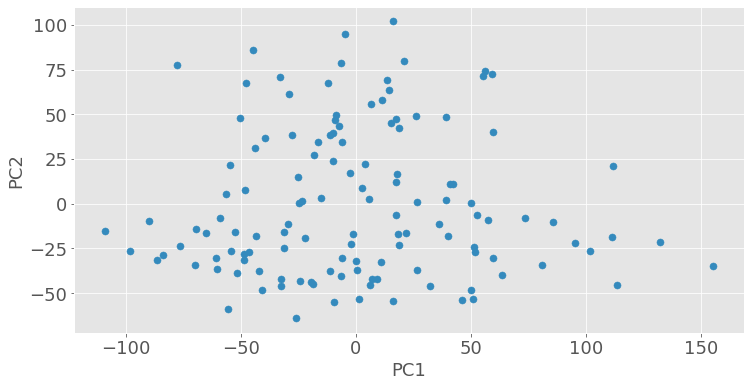

In [439]:
# Plot the scatter
ax = crohns_km.plot(kind="scatter", x='PC1', y='PC2', figsize=(12,6), s=50)
plt.xlabel("PC1", fontsize=18)
plt.ylabel("PC2", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [440]:
X = crohns_km.loc[:, ['PC1', 'PC2']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [441]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=42)

In [442]:
km.cluster_centers_

array([[ 1.19991823, -0.51938071],
       [-0.03408931,  1.23169564],
       [-0.7339529 , -0.6652241 ]])

In [443]:
km.predict(X_sc)

array([2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1,
       1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2])

In [444]:
crohns_km['cluster'] = km.labels_
crohns_km

,PC1,PC2,cluster
GSM76030,-22.259883,-19.480584,2
GSM76031,73.306650,-8.091231,0
GSM76032,58.999811,72.331030,1
GSM76033,13.465870,69.302729,1
GSM76034,-48.144358,7.859132,2
...,...,...,...
GSM76152,59.684995,-30.314372,0
GSM76153,-109.115771,-15.203179,2
GSM76154,-48.788051,-28.416229,2
GSM76155,-6.205441,-30.132444,2


In [445]:
actuals = []
for item in UC:
    actuals.append(0)

actuals[:5]

[0, 0, 0, 0, 0]

In [446]:
for item in CD:
    actuals.append(1)

In [447]:
for item in NM:
    actuals.append(2)
len(actuals)

127

In [448]:
crohns_km['actual'] = actuals
        
crohns_km

,PC1,PC2,cluster,actual
GSM76030,-22.259883,-19.480584,2,0
GSM76031,73.306650,-8.091231,0,0
GSM76032,58.999811,72.331030,1,0
GSM76033,13.465870,69.302729,1,0
GSM76034,-48.144358,7.859132,2,0
...,...,...,...,...
GSM76152,59.684995,-30.314372,0,2
GSM76153,-109.115771,-15.203179,2,2
GSM76154,-48.788051,-28.416229,2,2
GSM76155,-6.205441,-30.132444,2,2


In [449]:
crohns_km.groupby('cluster').mean()

,PC1,PC2,actual
cluster,,,
0,59.696281,-21.137717,0.939394
1,-1.695953,50.127456,0.928571
2,-36.514370,-27.073241,1.403846


In [450]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=['PC1', 'PC2']
)
centroids

,PC1,PC2
0,59.696281,-21.137717
1,-1.695953,50.127456
2,-36.514370,-27.073241


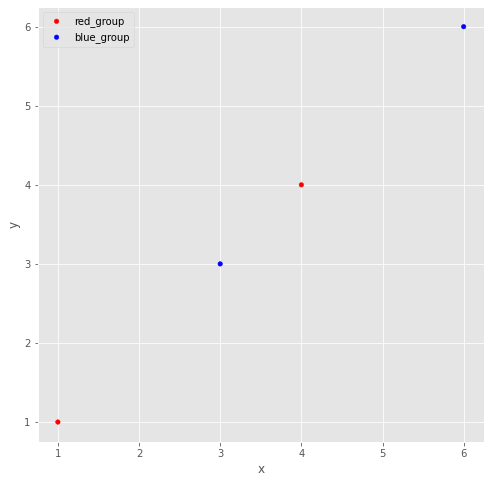

In [451]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6], 
                   'y': [1, 2, 3, 4, 5, 6], 
                   'c': ['r', 'g', 'b', 'r', 'g', 'b']})
fig, ax = plt.subplots(figsize=(8,8))
df[df.c == 'r'].plot.scatter(
    x='x', y='y', c='c', label='red_group', ax=ax);
df[df.c == 'b'].plot.scatter(
    x='x', y='y', c='c', label='blue_group', ax=ax);

<Figure size 504x504 with 0 Axes>

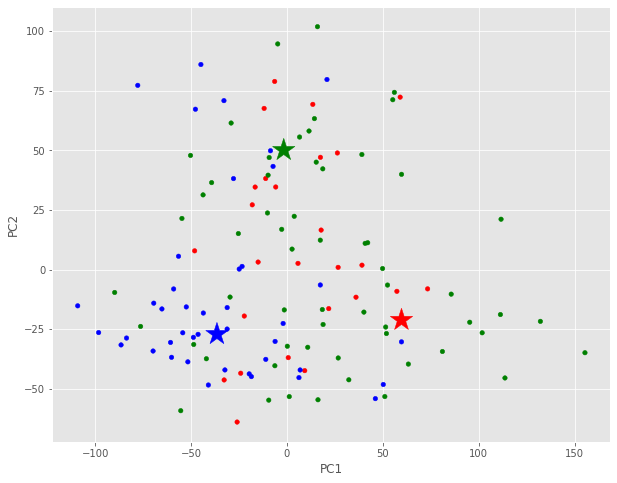

In [453]:
# Code modified from Generally Assembly Data Science Immersive-KMeans Lesson

plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
crohns_km['color'] = crohns_km['actual'].map(lambda p: colors[p])


ax = crohns_km.plot(    
    kind="scatter", 
    x='PC1', y='PC2',
    figsize=(10,8),
    c = crohns_km['color']
)

centroids.plot(
    kind="scatter", 
    x='PC1', y='PC2', 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);



In [454]:
from sklearn.metrics import silhouette_score
uc_sil = silhouette_score(X_sc[:len(UC)], km.labels_[:len(UC)])
cd_sil = silhouette_score(X_sc[len(UC): len(CD)], km.labels_[len(UC): len(CD)])
ind = len(UC) + len(CD)
ind
nm_sil = silhouette_score(X_sc[86:],km.labels_[86:])
uc_sil, cd_sil, nm_sil

(0.4123120757766407, 0.3780757179423866, 0.5155209548892772)

### Compare to UMAP in limma/Bioconductor

```
# UMAP plot (dimensionality reduction)
ex <- na.omit(ex) # eliminate rows with NAs
ex <- ex[!duplicated(ex), ]  # remove duplicates
ump <- umap(t(ex), n_neighbors = 15, random_state = 123)
par(mar=c(3,3,2,6), xpd=TRUE)
plot(ump$layout, main="UMAP plot, nbrs=15", xlab="", ylab="", col=gs, pch=20, cex=1.5)
legend("topright", inset=c(-0.15,0), legend=levels(gs), pch=20,
col=1:nlevels(gs), title="Group", pt.cex=1.5)
library("maptools")  # point labels without overlaps
pointLabel(ump$layout, labels = rownames(ump$layout), method="SANN", cex=0.6)
```

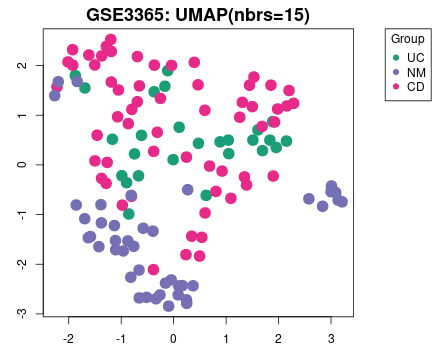